实验环境信息等内容网址：

repo: [Streamer0320/NLP-3b | GitHub](https://github.com/Streamer0320/NLP-3b/)

fork: [jin-hao-0320/NLP-3b | Gitee](https://gitee.com/jin-hao-0320/NLP-3b)

# 6. 学习分类文本

模式识别是自然语言处理的一个核心部分。以-ed结尾的词往往是过去时态动词（[5.](https://usyiyi.github.io/nlp-py-2e-zh/5.html#chap-tag)）。频繁使用will是新闻文本的暗示（[3](https://usyiyi.github.io/nlp-py-2e-zh/3.html#chap-words)）。这些可观察到的模式——词的结构和词频——恰好与特定方面的含义关联，如时态和主题。但我们怎么知道从哪里开始寻找，形式的哪一方面关联含义的哪一方面？

本章的目的是要回答下列问题：

1. 我们怎样才能识别语言数据中能明显用于对其分类的特征？
2. 我们怎样才能构建语言模型，用于自动执行语言处理任务？
3. 从这些模型中我们可以学到哪些关于语言的知识？

一路上，我们将研究一些重要的机器学习技术，包括决策树、朴素贝叶斯分类器和最大熵分类。我们会掩盖这些技术的数学和统计的基础，集中关注如何以及何时使用它们（更多的技术背景知识见进一步阅读一节）。在看这些方法之前，我们首先需要知道这个主题的范围十分广泛。

<a href="#1-有监督分类">1 有监督分类</a> 

<a href="#2-有监督分类的更多例子">2 有监督分类的更多例子</a> 

<a href="#3-评估">3 评估 </a> 

<a href="#4-决策树">4 决策树</a> 

<a href="#5-朴素贝叶斯分类器">5 朴素贝叶斯分类器</a> 

## 1 有监督分类

分类是为给定的输入选择正确的类标签的任务。在基本的分类任务中，每个输入被认为是与所有其它输入隔离的，并且标签集是预先定义的。这里是分类任务的一些例子：

- 判断一封电子邮件是否是垃圾邮件。
- 从一个固定的主题领域列表中，如“体育”、“技术”和“政治”，决定新闻报道的主题是什么。
- 决定词bank给定的出现是用来指河的坡岸、一个金融机构、向一边倾斜的动作还是在金融机构里的存储行为。

基本的分类任务有许多有趣的变种。例如，在多类分类中，每个实例可以分配多个标签；在开放性分类中，标签集是事先没有定义的；在序列分类中，一个输入列表作为一个整体分类。

一个分类称为有监督的，如果它的建立基于训练语料的每个输入包含正确标签。有监督分类使用的框架图如 [1.1](https://usyiyi.github.io/nlp-py-2e-zh/6.html#fig-supervised-classification)所示。

![Images/supervised-classification.png](https://usyiyi.github.io/nlp-py-2e-zh/Images/fb1a02fe3607a0deb452086296fd6f69.jpg)

图 1.1：有监督分类。（a）在训练过程中，特征提取器用来将每一个输入值转换为特征集。这些特征集捕捉每个输入中应被用于对其分类的基本信息，我们将在下一节中讨论它。特征集与标签的配对被送入机器学习算法，生成模型。（b）在预测过程中，相同的特征提取器被用来将未见过的输入转换为特征集。之后，这些特征集被送入模型产生预测标签。

在本节的其余部分，我们将着眼于分类器如何能够解决各种各样的任务。我们讨论的目的不是要范围全面，而是给出在文本分类器的帮助下执行的任务的一个代表性的例子。

**vscode jupyter TOC**

<a href="#11-性别鉴定">1.1 性别鉴定</a> 

<a href="#12-选择红正确的特正">1.2 选择红正确的特正</a> 

<a href="#13-文档分类">1.3 文档分类</a> 

<a href="#14-词性标注">1.4 词性标注 </a> 

<a href="#15-探索上下文语境">1.5 探索上下文语境</a>  

<a href="#16-序列分类">1.6 序列分类 </a> 

<a href="#17-其他序列分类方法">1.7 其他序列分类方法</a> 

**jupyter notebook TOC**

<a href="#1.1-性别鉴定">1.1 性别鉴定</a> 

<a href="#1.2-选择红正确的特正">1.2 选择红正确的特正</a> 

<a href="#1.3-文档分类">1.3 文档分类</a> 

<a href="#1.4-词性标注">1.4 词性标注 </a> 

<a href="#1.5-探索上下文语境">1.5 探索上下文语境</a>  

<a href="#1.6-序列分类">1.6 序列分类 </a> 

<a href="#1.7-其他序列分类方法">1.7 其他序列分类方法</a> 


## 1.1 性别鉴定

在[4](https://usyiyi.github.io/nlp-py-2e-zh/2.html#sec-lexical-resources)中，我们看到，男性和女性的名字有一些鲜明的特点。以a，e和i结尾的很可能是女性，而以k，o，r，s和t结尾的很可能是男性。让我们建立一个分类器更精确地模拟这些差异。

创建一个分类器的第一步是决定输入的什么样的特征是相关的，以及如何为那些特征编码。在这个例子中，我们一开始只是寻找一个给定的名称的最后一个字母。以下特征提取器函数建立一个字典，包含有关给定名称的相关信息：

In [1]:
def gender_features(word):
    return {'last_letter': word[-1]}
gender_features('Shrek')

{'last_letter': 'k'}

这个函数返回的字典被称为特征集，映射特征名称到它们的值。特征名称是区分大小写的字符串，通常提供一个简短的人可读的特征描述，例如本例中的`'last_letter'`。特征值是简单类型的值，如布尔、数字和字符串。

注意

大多数分类方法要求特征使用简单的类型进行编码，如布尔类型、数字和字符串。但要注意仅仅因为一个特征是简单类型，并不一定意味着该特征的值易于表达或计算。的确，它可以用非常复杂的和有信息量的值作为特征，如第2个有监督分类器的输出。

现在，我们已经定义了一个特征提取器，我们需要准备一个例子和对应类标签的列表。

In [2]:
from nltk.corpus import names
labeled_names = ([(name, 'male') for name in names.words('male.txt')] +
[(name, 'female') for name in names.words('female.txt')])
import random
random.shuffle(labeled_names)

接下来，我们使用特征提取器处理`names`数据，并划分特征集的结果链表为一个训练集和一个测试集。训练集用于训练一个新的“朴素贝叶斯”分类器。

In [3]:
import nltk

featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

在本章的后面，我们将学习更多关于朴素贝叶斯分类器的内容。现在，让我们只是在上面测试一些没有出现在训练数据中的名字：

In [4]:
classifier.classify(gender_features('Neo'))

'male'

In [5]:
classifier.classify(gender_features('Trinity'))

'female'

请看*《黑客帝国》*中这些角色的名字被正确分类。尽管这部科幻电影的背景是在2199年，但它仍然符合我们有关名字和性别的预期。我们可以在大数据量的未见过的数据上系统地评估这个分类器：

In [6]:
print(nltk.classify.accuracy(classifier, test_set))

0.77


最后，我们可以检查分类器，确定哪些特征对于区分名字的性别是最有效的：

In [7]:
classifier.show_most_informative_features(5)

Most Informative Features
             last_letter = 'a'            female : male   =     35.8 : 1.0
             last_letter = 'k'              male : female =     31.4 : 1.0
             last_letter = 'f'              male : female =     27.4 : 1.0
             last_letter = 'p'              male : female =     11.8 : 1.0
             last_letter = 'v'              male : female =     10.4 : 1.0


此列表显示训练集中以a 结尾的名字中女性是男性的38倍，而以k 结尾名字中男性是女性的31倍。这些比率称为似然比，可以用于比较不同特征-结果关系。

注意

**轮到你来：**修改`gender_features()`函数，为分类器提供名称的长度、它的第一个字母以及任何其他看起来可能有用的特征。用这些新特征重新训练分类器，并测试其准确性。

在处理大型语料库时，构建一个包含每一个实例的特征的单独的列表会使用大量的内存。在这些情况下，使用函数`nltk.classify.apply_features`，返回一个行为像一个列表而不会在内存存储所有特征集的对象：

In [8]:
from nltk.classify import apply_features
train_set = apply_features(gender_features, labeled_names[500:])
test_set = apply_features(gender_features, labeled_names[:500])

## 1.2 选择正确的特征

选择相关的特征，并决定如何为一个学习方法编码它们，这对学习方法提取一个好的模型可以产生巨大的影响。建立一个分类器的很多有趣的工作之一是找出哪些特征可能是相关的，以及我们如何能够表示它们。虽然使用相当简单而明显的特征集往往可以得到像样的性能，但是使用精心构建的基于对当前任务的透彻理解的特征，通常会显著提高收益。

典型地，特征提取通过反复试验和错误的过程建立的，由哪些信息是与问题相关的直觉指引的。它通常以“厨房水槽”的方法开始，包括你能想到的所有特征，然后检查哪些特征是实际有用的。我们在[1.2](https://usyiyi.github.io/nlp-py-2e-zh/6.html#code-gender-features-overfitting)中对名字性别特征采取这种做法。

In [9]:
def gender_features2(name):
    features = {}
    features["first_letter"] = name[0].lower()
    features["last_letter"] = name[-1].lower()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count({})".format(letter)] = name.lower().count(letter)
        features["has({})".format(letter)] = (letter in name.lower())
    return features

然而，你要用于一个给定的学习算法的特征的数目是有限的——如果你提供太多的特征，那么该算法将高度依赖你的训练数据的特性，而一般化到新的例子的效果不会很好。这个问题被称为过拟合，当运作在小训练集上时尤其会有问题。例如，如果我们使用[1.2](https://usyiyi.github.io/nlp-py-2e-zh/6.html#code-gender-features-overfitting)中所示的特征提取器训练朴素贝叶斯分类器，将会过拟合这个相对较小的训练集，造成这个系统的精度比只考虑每个名字最后一个字母的分类器的精度低约1％：

In [10]:
featuresets = [(gender_features2(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.79


一旦初始特征集被选定，完善特征集的一个非常有成效的方法是错误分析。首先，我们选择一个开发集，包含用于创建模型的语料数据。然后将这种开发集分为训练集和开发测试集。

In [11]:
train_names = labeled_names[1500:]
devtest_names = labeled_names[500:1500]
test_names = labeled_names[:500]

训练集用于训练模型，开发测试集用于进行错误分析。测试集用于系统的最终评估。由于下面讨论的原因，我们将一个单独的开发测试集用于错误分析而不是使用测试集是很重要的。在[1.3](https://usyiyi.github.io/nlp-py-2e-zh/6.html#fig-corpus-org)中显示了将语料数据划分成不同的子集。

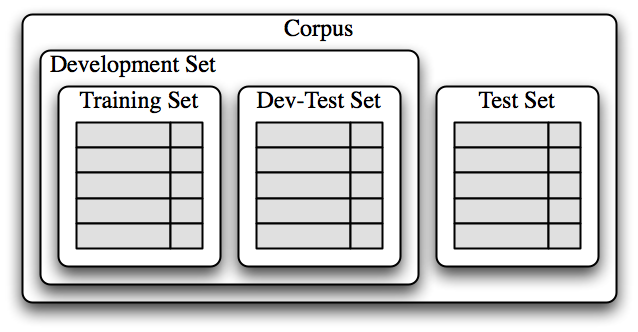

图 1.3：用于训练有监督分类器的语料数据组织图。语料数据分为两类：开发集和测试集。开发集通常被进一步分为训练集和开发测试集。

已经将语料分为适当的数据集，我们使用训练集训练一个模型 [# 1](https://usyiyi.github.io/nlp-py-2e-zh/6.html#err-analysis-train)，然后在开发测试集上运行 [# 2](https://usyiyi.github.io/nlp-py-2e-zh/6.html#err-analysis-run)。

In [12]:
train_set = [(gender_features(n), gender) for (n, gender) in train_names]
devtest_set = [(gender_features(n), gender) for (n, gender) in devtest_names]
test_set = [(gender_features(n), gender) for (n, gender) in test_names]
classifier = nltk.NaiveBayesClassifier.train(train_set) 
print(nltk.classify.accuracy(classifier, devtest_set)) 

0.749


使用开发测试集，我们可以生成一个分类器预测名字性别时的错误列表：

In [13]:
errors = []
for (name, tag) in devtest_names:
    guess = classifier.classify(gender_features(name))
    if guess != tag:
        errors.append( (tag, guess, name) )

然后，可以检查个别错误案例，在那里该模型预测了错误的标签，尝试确定什么额外信息将使其能够作出正确的决定（或者现有的哪部分信息导致其做出错误的决定）。然后可以相应的调整特征集。我们已经建立的名字分类器在开发测试语料上产生约100个错误：

In [14]:
for (tag, guess, name) in sorted(errors):
    print('correct={:<8} guess={:<8s} name={:<30}'.format(tag, guess, name))

correct=female   guess=male     name=Abagail                       
correct=female   guess=male     name=April                         
correct=female   guess=male     name=Ardelis                       
correct=female   guess=male     name=Arleen                        
correct=female   guess=male     name=Babs                          
correct=female   guess=male     name=Bette-Ann                     
correct=female   guess=male     name=Brigid                        
correct=female   guess=male     name=Calypso                       
correct=female   guess=male     name=Carlen                        
correct=female   guess=male     name=Caro                          
correct=female   guess=male     name=Carolan                       
correct=female   guess=male     name=Cathryn                       
correct=female   guess=male     name=Cecil                         
correct=female   guess=male     name=Charleen                      
correct=female   guess=male     name=Charlott   

浏览这个错误列表，它明确指出一些多个字母的后缀可以指示名字性别。例如，yn结尾的名字显示以女性为主，尽管事实上，n结尾的名字往往是男性；以ch结尾的名字通常是男性，尽管以h结尾的名字倾向于是女性。因此，调整我们的特征提取器包括两个字母后缀的特征：

In [15]:
def gender_features(word):
    return {'suffix1': word[-1:],
            'suffix2': word[-2:]}

使用新的特征提取器重建分类器，我们看到测试数据集上的性能提高了近3个百分点（从76.5％到78.2％）：

In [16]:
train_set = [(gender_features(n), gender) for (n, gender) in train_names]
devtest_set = [(gender_features(n), gender) for (n, gender) in devtest_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, devtest_set))

0.768


这个错误分析过程可以不断重复，检查存在于由新改进的分类器产生的错误中的模式。每一次错误分析过程被重复，我们应该选择一个不同的开发测试/训练分割，以确保该分类器不会开始反映开发测试集的特质。

但是，一旦我们已经使用了开发测试集帮助我们开发模型，关于这个模型在新数据会表现多好，我们将不能再相信它会给我们一个准确地结果。因此，保持测试集分离、未使用过，直到我们的模型开发完毕是很重要的。在这一点上，我们可以使用测试集评估模型在新的输入值上执行的有多好。

## 1.3 文档分类

在 [1](https://usyiyi.github.io/nlp-py-2e-zh/2.html#sec-extracting-text-from-corpora)中，我们看到了语料库的几个例子，那里文档已经按类别标记。使用这些语料库，我们可以建立分类器，自动给新文档添加适当的类别标签。首先，我们构造一个标记了相应类别的文档清单。对于这个例子，我们选择电影评论语料库，将每个评论归类为正面或负面。

In [17]:
from nltk.corpus import movie_reviews
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

接下来，我们为文档定义一个特征提取器，这样分类器就会知道哪些方面的数据应注意（[1.4](https://usyiyi.github.io/nlp-py-2e-zh/6.html#code-document-classify-fd)）。对于文档主题识别，我们可以为每个词定义一个特性表示该文档是否包含这个词。为了限制分类器需要处理的特征的数目，我们一开始构建一个整个语料库中前2000个最频繁词的列表 [# 1](https://usyiyi.github.io/nlp-py-2e-zh/6.html#document-classify-all-words)。然后，定义一个特征提取器 [# 2](https://usyiyi.github.io/nlp-py-2e-zh/6.html#document-classify-extractor)，简单地检查这些词是否在一个给定的文档中。

In [18]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000] 

def document_features(document): 
    document_words = set(document) 
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

注意

在 [# 3](https://usyiyi.github.io/nlp-py-2e-zh/6.html#document-classify-set)中我们计算文档的所有词的集合，而不仅仅检查是否`word in document`，因为检查一个词是否在一个集合中出现比检查它是否在一个列表中出现要快的多（[4.7](https://usyiyi.github.io/nlp-py-2e-zh/4.html#sec-algorithm-design)）。

现在，我们已经定义了我们的特征提取器，可以用它来训练一个分类器，为新的电影评论加标签（[1.5](https://usyiyi.github.io/nlp-py-2e-zh/6.html#code-document-classify-use)）。为了检查产生的分类器可靠性如何，我们在测试集上计算其准确性 [# 1](https://usyiyi.github.io/nlp-py-2e-zh/6.html#document-classify-test)。再一次的，我们可以使用`show_most_informative_features()`来找出哪些特征是分类器发现最有信息量的 [# 2](https://usyiyi.github.io/nlp-py-2e-zh/6.html#document-classify-smif)。

In [19]:
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

显然在这个语料库中，提到Seagal的评论中负面的是正面的大约8倍，而提到Damon的评论中正面的是负面的大约6倍。

## 1.4 词性标注

第[5.](https://usyiyi.github.io/nlp-py-2e-zh/5.html#chap-tag)中，我们建立了一个正则表达式标注器，通过查找词内部的组成，为词选择词性标记。然而，这个正则表达式标注器是手工制作的。作为替代，我们可以训练一个分类器来算出哪个后缀最有信息量。首先，让我们找出最常见的后缀：

In [20]:
from nltk.corpus import brown
suffix_fdist = nltk.FreqDist()
for word in brown.words():
    word = word.lower()
    suffix_fdist[word[-1:]] += 1
    suffix_fdist[word[-2:]] += 1
    suffix_fdist[word[-3:]] += 1
common_suffixes = [suffix for (suffix, count) in suffix_fdist.most_common(100)]
print(common_suffixes)

['e', ',', '.', 's', 'd', 't', 'he', 'n', 'a', 'of', 'the', 'y', 'r', 'to', 'in', 'f', 'o', 'ed', 'nd', 'is', 'on', 'l', 'g', 'and', 'ng', 'er', 'as', 'ing', 'h', 'at', 'es', 'or', 're', 'it', '``', 'an', "''", 'm', ';', 'i', 'ly', 'ion', 'en', 'al', '?', 'nt', 'be', 'hat', 'st', 'his', 'th', 'll', 'le', 'ce', 'by', 'ts', 'me', 've', "'", 'se', 'ut', 'was', 'for', 'ent', 'ch', 'k', 'w', 'ld', '`', 'rs', 'ted', 'ere', 'her', 'ne', 'ns', 'ith', 'ad', 'ry', ')', '(', 'te', '--', 'ay', 'ty', 'ot', 'p', 'nce', "'s", 'ter', 'om', 'ss', ':', 'we', 'are', 'c', 'ers', 'uld', 'had', 'so', 'ey']


接下来，我们将定义一个特征提取器函数，检查给定的单词的这些后缀：

In [21]:
def pos_features(word):
    features = {}
    for suffix in common_suffixes:
        features['endswith({})'.format(suffix)] = word.lower().endswith(suffix)
    return features

特征提取函数的行为就像有色眼镜一样，强调我们的数据中的某些属性（颜色），并使其无法看到其他属性。分类器在决定如何标记输入时，将完全依赖它们强调的属性。在这种情况下，分类器将只基于一个给定的词拥有（如果有）哪个常见后缀的信息来做决定。

现在，我们已经定义了我们的特征提取器，可以用它来训练一个新的“决策树”的分类器（将在[4](https://usyiyi.github.io/nlp-py-2e-zh/6.html#sec-decision-trees)讨论）：

In [22]:
tagged_words = brown.tagged_words(categories='news')
featuresets = [(pos_features(n), g) for (n,g) in tagged_words]

In [23]:
size = int(len(featuresets) * 0.1)
train_set, test_set = featuresets[size:], featuresets[:size]

In [24]:
classifier = nltk.DecisionTreeClassifier.train(train_set)
nltk.classify.accuracy(classifier, test_set)

0.6270512182993535

In [25]:
classifier.classify(pos_features('cats'))

'NNS'

决策树模型的一个很好的性质是它们往往很容易解释——我们甚至可以指示NLTK将它们以伪代码形式输出：

In [27]:
print(classifier.pseudocode(depth=4))

if endswith(the) == False: 
  if endswith(,) == False: 
    if endswith(s) == False: 
      if endswith(.) == False: return '.'
      if endswith(.) == True: return '.'
    if endswith(s) == True: 
      if endswith(is) == False: return 'PP$'
      if endswith(is) == True: return 'BEZ'
  if endswith(,) == True: return ','
if endswith(the) == True: return 'AT'



在这里，我们可以看到分类器一开始检查一个词是否以逗号结尾——如果是，它会得到一个特别的标记`","`。接下来，分类器检查词是否以`"the"`尾，这种情况它几乎肯定是一个限定词。这个“后缀”被决策树早早使用是因为词"the"太常见。分类器继续检查词是否以"s"结尾。如果是，那么它极有可能得到动词标记`VBZ`（除非它是这个词"is"，它有特殊标记`BEZ`），如果不是，那么它往往是名词（除非它是标点符号“.”）。实际的分类器包含这里显示的if-then语句下面进一步的嵌套，参数`depth=4` 只显示决策树的顶端部分。

## 1.5 探索上下文语境

通过增加特征提取函数，我们可以修改这个词性标注器来利用各种词内部的其他特征，例如词长、它所包含的音节数或者它的前缀。然而，只要特征提取器仅仅看着目标词，我们就没法添加依赖词出现的*上下文语境*特征。然而上下文语境特征往往提供关于正确标记的强大线索——例如，标注词"fly"，如果知道它前面的词是“a”将使我们能够确定它是一个名词，而不是一个动词。

为了采取基于词的上下文的特征，我们必须修改以前为我们的特征提取器定义的模式。不是只传递已标注的词，我们将传递整个（未标注的）句子，以及目标词的索引。[1.6](https://usyiyi.github.io/nlp-py-2e-zh/6.html#code-suffix-pos-tag)演示了这种方法，使用依赖上下文的特征提取器定义一个词性标记分类器。

In [28]:
def pos_features(sentence, i): 
    features = {"suffix(1)": sentence[i][-1:],
                "suffix(2)": sentence[i][-2:],
                "suffix(3)": sentence[i][-3:]}
    if i == 0:
        features["prev-word"] = "<START>"
    else:
        features["prev-word"] = sentence[i-1]
    return features

很显然，利用上下文特征提高了我们的词性标注器的准确性。例如，分类器学到一个词如果紧跟在词"large"或"gubernatorial"后面，极可能是名词。然而，它无法学到，一个词如果它跟在形容词后面可能是名词，这样更一般的，因为它没有获得前面这个词的词性标记。在一般情况下，简单的分类器总是将每一个输入与所有其他输入独立对待。在许多情况下，这非常有道理。例如，关于名字是否倾向于男性或女性的决定可以通过具体分析来做出。然而，有很多情况，如词性标注，我们感兴趣的是解决彼此密切相关的分类问题。

## 1.6 序列分类

为了捕捉相关的分类任务之间的依赖关系，我们可以使用联合分类器模型，收集有关输入，选择适当的标签。在词性标注的例子中，各种不同的序列分类器模型可以被用来为一个给定的句子中的所有的词共同选择词性标签。

一种序列分类器策略，称为连续分类或贪婪序列分类，是为第一个输入找到最有可能的类标签，然后使用这个问题的答案帮助找到下一个输入的最佳的标签。这个过程可以不断重复直到所有的输入都被贴上标签。这是[5](https://usyiyi.github.io/nlp-py-2e-zh/5.html#sec-n-gram-tagging)中的二元标注器采用的方法，它一开始为句子的第一个词选择词性标记，然后为每个随后的词选择标记，基于词本身和前面词的预测的标记。

在[1.7](https://usyiyi.github.io/nlp-py-2e-zh/6.html#code-consecutive-pos-tagger)中演示了这一策略。首先，我们必须扩展我们的特征提取函数使其具有参数`history`，它提供一个我们到目前为止已经为句子预测的标记的列表 [# 1](https://usyiyi.github.io/nlp-py-2e-zh/6.html#consec-pos-tag-features)。`history`中的每个标记对应`sentence`中的一个词。但是请注意，`history`将只包含我们已经归类的词的标记，也就是目标词左侧的词。因此，虽然是有可能查看目标词右边的词的某些特征，但查看那些词的标记是不可能的（因为我们还未产生它们）。

已经定义了特征提取器，我们可以继续建立我们的序列分类器 [# 2](https://usyiyi.github.io/nlp-py-2e-zh/6.html#consec-pos-tagger)。在训练中，我们使用已标注的标记为征提取器提供适当的历史信息，但标注新的句子时，我们基于标注器本身的输出产生历史信息。

In [29]:
 def pos_features(sentence, i, history): 
     features = {"suffix(1)": sentence[i][-1:],
                 "suffix(2)": sentence[i][-2:],
                 "suffix(3)": sentence[i][-3:]}
     if i == 0:
         features["prev-word"] = "<START>"
         features["prev-tag"] = "<START>"
     else:
         features["prev-word"] = sentence[i-1]
         features["prev-tag"] = history[i-1]
     return features

class ConsecutivePosTagger(nltk.TaggerI): 

    def __init__(self, train_sents):
        train_set = []
        for tagged_sent in train_sents:
            untagged_sent = nltk.tag.untag(tagged_sent)
            history = []
            for i, (word, tag) in enumerate(tagged_sent):
                featureset = pos_features(untagged_sent, i, history)
                train_set.append( (featureset, tag) )
                history.append(tag)
        self.classifier = nltk.NaiveBayesClassifier.train(train_set)

    def tag(self, sentence):
        history = []
        for i, word in enumerate(sentence):
            featureset = pos_features(sentence, i, history)
            tag = self.classifier.classify(featureset)
            history.append(tag)
        return zip(sentence, history)

## 1.7 其他序列分类方法

这种方法的一个缺点是我们的决定一旦做出无法更改。例如，如果我们决定将一个词标注为名词，但后来发现的证据表明应该是一个动词，就没有办法回去修复我们的错误。这个问题的一个解决方案是采取转型策略。转型联合分类的工作原理是为输入的标签创建一个初始值，然后反复提炼那个值，尝试修复相关输入之间的不一致。Brill标注器，[(1)](https://usyiyi.github.io/nlp-py-2e-zh/5.html#sec-transformation-based-tagging)中描述的，是这种策略的一个很好的例子。

另一种方案是为词性标记所有可能的序列打分，选择总得分最高的序列。隐马尔可夫模型就采取这种方法。隐马尔可夫模型类似于连续分类器，它不光看输入也看已预测标记的历史。然而，不是简单地找出一个给定的词的单个最好的标签，而是为标记产生一个概率分布。然后将这些概率结合起来计算标记序列的概率得分，最高概率的标记序列会被选中。不幸的是，可能的标签序列的数量相当大。给定30 个标签的标记集，有大约600 万亿（3010）种方式来标记一个10个词的句子。为了避免单独考虑所有这些可能的序列，隐马尔可夫模型要求特征提取器只看最近的标记（或最近的n个标记，其中n是相当小的）。由于这种限制，它可以使用动态规划（[4.7](https://usyiyi.github.io/nlp-py-2e-zh/4.html#sec-algorithm-design)），有效地找出最有可能的标记序列。特别是，对每个连续的词索引i，每个可能的当前及以前的标记都被计算得分。这种同样基础的方法被两个更先进的模型所采用，它们被称为最大熵马尔可夫模型和线性链条件随机场模型；但为标记序列打分用的是不同的算法。

## 2 有监督分类的更多例子

**vscode jupyter TOC**

<a href="#21-句子分割">2.1 句子分割</a> 

<a href="#22-识别对话行为类型">2.2 识别对话行为类型</a> 

<a href="#23-识别文字蕴含">2.3 识别文字蕴含</a> 

<a href="#24-扩展到大型数据集">2.4 扩展到大型数据集</a> 

**jupyter notebook TOC**

<a href="#2.1-句子分割">2.1 句子分割</a> 

<a href="#2.2-识别对话行为类型">2.2 识别对话行为类型</a> 

<a href="#2.3-识别文字蕴含">2.3 识别文字蕴含</a> 

<a href="#2.4-扩展到大型数据集">2.4 扩展到大型数据集</a> 

## 2.1 句子分割

句子分割可以看作是一个标点符号的分类任务：每当我们遇到一个可能会结束一个句子的符号，如句号或问号，我们必须决定它是否终止了当前句子。

第一步是获得一些已被分割成句子的数据，将它转换成一种适合提取特征的形式：

In [30]:
sents = nltk.corpus.treebank_raw.sents()
tokens = []
boundaries = set()
offset = 0
for sent in sents:
    tokens.extend(sent)
    offset += len(sent)
    boundaries.add(offset-1)

在这里，`tokens`是单独句子标识符的合并列表，`boundaries`是一个包含所有句子边界词符索引的集合。下一步，我们需要指定用于决定标点是否表示句子边界的数据特征：

In [31]:
def punct_features(tokens, i):
    return {'next-word-capitalized': tokens[i+1][0].isupper(),
            'prev-word': tokens[i-1].lower(),
            'punct': tokens[i],
            'prev-word-is-one-char': len(tokens[i-1]) == 1}

基于这一特征提取器，我们可以通过选择所有的标点符号创建一个加标签的特征集的列表，然后标注它们是否是边界标识符：

In [32]:
featuresets = [(punct_features(tokens, i), (i in boundaries))
               for i in range(1, len(tokens)-1)
               if tokens[i] in '.?!']

使用这些特征集，我们可以训练和评估一个标点符号分类器：

In [33]:
size = int(len(featuresets) * 0.1)
train_set, test_set = featuresets[size:], featuresets[:size]
classifier = nltk.NaiveBayesClassifier.train(train_set)
nltk.classify.accuracy(classifier, test_set)

0.936026936026936

使用这种分类器进行断句，我们只需检查每个标点符号，看它是否是作为一个边界标识符；在边界标识符处分割词列表。在[2.1](https://usyiyi.github.io/nlp-py-2e-zh/6.html#code-classification-based-segmenter)中的清单显示了如何可以做到这一点。

In [34]:
def segment_sentences(words):
    start = 0
    sents = []
    for i, word in enumerate(words):
        if word in '.?!' and classifier.classify(punct_features(words, i)) == True:
            sents.append(words[start:i+1])
            start = i+1
    if start < len(words):
        sents.append(words[start:])
    return sents

## 2.2 识别对话行为类型

处理对话时，将对话看作说话者执行的*行为*是很有用的。对于表述行为的陈述句这种解释是最直白的，例如"I forgive you"或"I bet you can't climb that hill"。但是问候、问题、回答、断言和说明都可以被认为是基于语言的行为类型。识别对话中言语下的对话行为是理解谈话的重要的第一步。

NPS聊天语料库，在[1](https://usyiyi.github.io/nlp-py-2e-zh/2.html#sec-extracting-text-from-corpora)中的展示过，包括超过10,000个来自即时消息会话的帖子。这些帖子都已经被贴上15 种对话行为类型中的一种标签，例如“陈述”，“情感”，“yn问题”和“Continuer”。因此，我们可以利用这些数据建立一个分类器，识别新的即时消息帖子的对话行为类型。第一步是提取基本的消息数据。我们将调用`xml_posts()`来得到一个数据结构，表示每个帖子的XML注释：

In [35]:
posts = nltk.corpus.nps_chat.xml_posts()[:10000]

下一步，我们将定义一个简单的特征提取器，检查帖子包含什么词：

In [36]:
def dialogue_act_features(post):
    features = {}
    for word in nltk.word_tokenize(post):
        features['contains({})'.format(word.lower())] = True
    return features

最后，我们通过为每个帖子提取特征（使用`post.get('class')`获得一个帖子的对话行为类型）构造训练和测试数据，并创建一个新的分类器：

In [37]:
featuresets = [(dialogue_act_features(post.text), post.get('class'))
               for post in posts]
size = int(len(featuresets) * 0.1)
train_set, test_set = featuresets[size:], featuresets[:size]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.667


## 2.3 识别文字蕴含

识别文字蕴含（RTE）是判断文本*T*的一个给定片段是否蕴含着另一个叫做“假设”的文本（已经在[5](https://usyiyi.github.io/nlp-py-2e-zh/1.html#sec-automatic-natural-language-understanding)讨论过）。迄今为止，已经有4个RTE挑战赛，在那里共享的开发和测试数据会提供给参赛队伍。这里是挑战赛3开发数据集中的文本/假设对的两个例子。标签*True*表示蕴含成立，*False*表示蕴含不成立。

> Challenge 3, Pair 34 (True)
>
> > **T**: Parviz Davudi was representing Iran at a meeting of the Shanghai Co-operation Organisation (SCO), the fledgling association that binds Russia, China and four former Soviet republics of central Asia together to fight terrorism.
> >
> > **H**: China is a member of SCO.
>
> Challenge 3, Pair 81 (False)
>
> > **T**: According to NC Articles of Organization, the members of LLC company are H. Nelson Beavers, III, H. Chester Beavers and Jennie Beavers Stewart.
> >
> > **H**: Jennie Beavers Stewart is a share-holder of Carolina Analytical Laboratory.

应当强调，文字和假设之间的关系并不一定是逻辑蕴涵，而是一个人是否会得出结论：文本提供了合理的证据证明假设是真实的。

我们可以把RTE当作一个分类任务，尝试为每一对预测*True*/*False*标签。虽然这项任务的成功做法似乎看上去涉及语法分析、语义和现实世界的知识的组合，RTE的许多早期的尝试使用粗浅的分析基于文字和假设之间的在词级别的相似性取得了相当不错的结果。在理想情况下，我们希望如果有一个蕴涵那么假设所表示的所有信息也应该在文本中表示。相反，如果假设中有的资料文本中没有，那么就没有蕴涵。

在我们的RTE 特征探测器（[2.2](https://usyiyi.github.io/nlp-py-2e-zh/6.html#code-rte-features)）中，我们让词（即词类型）作为信息的代理，我们的特征计数词重叠的程度和假设中有而文本中没有的词的程度（由`hyp_extra()`方法获取）。不是所有的词都是同样重要的——命名实体，如人、组织和地方的名称，可能会更为重要，这促使我们分别为`word`s和`ne`s（命名实体）提取不同的信息。此外，一些高频虚词作为“停用词”被过滤掉。

In [38]:
def rte_features(rtepair):
    extractor = nltk.RTEFeatureExtractor(rtepair)
    features = {}
    features['word_overlap'] = len(extractor.overlap('word'))
    features['word_hyp_extra'] = len(extractor.hyp_extra('word'))
    features['ne_overlap'] = len(extractor.overlap('ne'))
    features['ne_hyp_extra'] = len(extractor.hyp_extra('ne'))
    return features

为了说明这些特征的内容，我们检查前面显示的文本/假设对34的一些属性：

In [39]:
rtepair = nltk.corpus.rte.pairs(['rte3_dev.xml'])[33]
extractor = nltk.RTEFeatureExtractor(rtepair)
print(extractor.text_words)

{'Iran', 'Shanghai', 'republics', 'terrorism.', 'binds', 'Asia', 'Co', 'central', 'meeting', 'operation', 'Parviz', 'Soviet', 'that', 'together', 'four', 'fledgling', 'representing', 'SCO', 'was', 'China', 'Davudi', 'Organisation', 'at', 'former', 'association', 'fight', 'Russia'}


In [40]:
print(extractor.hyp_words)

{'SCO.', 'China', 'member'}


In [41]:
print(extractor.overlap('word'))

set()


In [42]:
print(extractor.overlap('ne'))

{'China'}


In [43]:
print(extractor.hyp_extra('word'))

{'member'}


这些特征表明假设中所有重要的词都包含在文本中，因此有一些证据支持标记这个为*True*。

`nltk.classify.rte_classify`模块使用这些方法在合并的RTE测试数据上取得了刚刚超过58％的准确率。这个数字并不是很令人印象深刻的，还需要大量的努力，更多的语言学处理，才能达到更好的结果。

## 2.4 扩展到大型数据集

Python提供了一个良好的环境进行基本的文本处理和特征提取。然而，它处理机器学习方法需要的密集数值计算不能够如C语言那样的低级语言那么快。因此，如果你尝试在大型数据集使用纯Python 的机器学习实现（如`nltk.NaiveBayesClassifier`），你可能会发现学习算法会花费大量的时间和内存。

如果你打算用大量训练数据或大量特征来训练分类器，我们建议你探索NLTK与外部机器学习包的接口。只要这些软件包已安装，NLTK可以透明地调用它们（通过系统调用）来训练分类模型，明显比纯Python的分类实现快。请看NLTK网站上推荐的NLTK支持的机器学习包列表。

## 3 评估

为了决定一个分类模型是否准确地捕捉了模式，我们必须评估该模型。评估的结果对于决定模型是多么值得信赖以及我们如何使用它是非常重要。评估也可以是一个有效的工具，用于指导我们在未来改进模型。

**vscode jupyter TOC**

<a href="#31-测试集">3.1 测试集</a> 

<a href="#32-准确度">3.2 准确度</a> 

<a href="#33-精确度和召回率">3.3 精确度和召回率</a> 

<a href="#34-混淆矩阵">3.4 混淆矩阵</a> 

<a href="#35-交叉验证">3.5 交叉验证</a> 

**jupyter notebook TOC**

<a href="#3.1-测试集">3.1 测试集</a> 

<a href="#3.2-准确度">3.2 准确度</a> 

<a href="#3.3-精确度和召回率">3.3 精确度和召回率</a> 

<a href="#3.4-混淆矩阵">3.4 混淆矩阵</a> 

<a href="#3.5-交叉验证">3.5 交叉验证</a> 


## 3.1 测试集

大多数评估技术为模型计算一个得分，通过比较它在测试集（或评估集）中为输入生成的标签与那些输入的正确标签。该测试集通常与训练集具有相同的格式。然而，测试集与训练语料不同是非常重要的：如果我们简单地重复使用训练集作为测试集，那么一个只记住了它的输入而没有学会如何推广到新的例子的模型会得到误导人的高分。

建立测试集时，往往是一个可用于测试的和可用于训练的数据量之间的权衡。对于有少量平衡的标签和一个多样化的测试集的分类任务，只要100个评估实例就可以进行有意义的评估。但是，如果一个分类任务有大量的标签或包括非常罕见的标签，那么选择的测试集的大小就要保证出现次数最少的标签至少出现50次。此外，如果测试集包含许多密切相关的实例——例如来自一个单独文档中的实例——那么测试集的大小应增加，以确保这种多样性的缺乏不会扭曲评估结果。当有大量已标注数据可用时，只使用整体数据的10％进行评估常常会在安全方面犯错。

选择测试集时另一个需要考虑的是测试集中实例与开发集中的实例的相似程度。这两个数据集越相似，我们对将评估结果推广到其他数据集的信心就越小。例如，考虑词性标注任务。在一种极端情况，我们可以通过从一个反映单一的文体（如新闻）的数据源随机分配句子，创建训练集和测试集：

In [44]:
import random
from nltk.corpus import brown
tagged_sents = list(brown.tagged_sents(categories='news'))
random.shuffle(tagged_sents)
size = int(len(tagged_sents) * 0.1)
train_set, test_set = tagged_sents[size:], tagged_sents[:size]

在这种情况下，我们的测试集和训练集将是*非常*相似的。训练集和测试集均取自同一文体，所以我们不能相信评估结果可以推广到其他文体。更糟糕的是，因为调用`random.shuffle()`，测试集中包含来自训练使用过的相同的文档的句子。如果文档中有相容的模式（也就是说，如果一个给定的词与特定词性标记一起出现特别频繁），那么这种差异将体现在开发集和测试集。一个稍好的做法是确保训练集和测试集来自不同的文件：

In [45]:
file_ids = brown.fileids(categories='news')
size = int(len(file_ids) * 0.1)
train_set = brown.tagged_sents(file_ids[size:])
test_set = brown.tagged_sents(file_ids[:size])

如果我们要执行更令人信服的评估，可以从与训练集中文档联系更少的文档中获取测试集：

In [77]:
# train_set = brown.tagged_sents(categories='news') # 原始代码获取训练集和测试集格式错误
# test_set = brown.tagged_sents(categories='fiction')

train_sents = brown.tagged_sents(categories=['news', 'editorial'])
test_sents = brown.tagged_sents(categories=['fiction', 'humor'])

如果我们在此测试集上建立了一个性能很好的分类器，那么我们完全可以相信它有能力很好的泛化到用于训练它的数据以外的数据。

## 3.2 准确度

用于评估一个分类最简单的度量是准确度，测量测试集上分类器正确标注的输入的比例。例如，一个名字性别分类器，在包含80个名字的测试集上预测正确的名字有60个，它有60/80 = 75％的准确度。`nltk.classify.accuracy()`函数会在给定的测试集上计算分类器模型的准确度：

In [76]:
# 构建特征提取器
def pos_features(sentence, i):
    features = {'suffix(1)': sentence[i][-1:],
                'suffix(2)': sentence[i][-2:],
                'suffix(3)': sentence[i][-3:]}
    if i == 0:
        features['prev-word'] = '<START>'
    else:
        features['prev-word'] = sentence[i-1]
    return features

# 构建训练集和测试集
train_set = [(pos_features(sent, i), tag) 
             for sent in train_sents 
             for i, (word, tag) in enumerate(sent)]
test_set = [(pos_features(sent, i), tag) 
            for sent in test_sents 
            for i, (word, tag) in enumerate(sent)]

# 训练并评估分类器
classifier = nltk.NaiveBayesClassifier.train(train_set)
print('Accuracy: {:4.2f}'.format(nltk.classify.accuracy(classifier, test_set)))

Accuracy: 1.00


解释一个分类器的准确性得分，考虑测试集中单个类标签的频率是很重要的。例如，考虑一个决定词bank每次出现的正确的词意的分类器。如果我们在金融新闻文本上评估分类器，那么我们可能会发现，`金融机构`的意思20个里面出现了19次。在这种情况下，95％的准确度也难以给人留下深刻印象，因为我们可以实现一个模型，它总是返回`金融机构`的意义。然而，如果我们在一个更加平衡的语料库上评估分类器，那里的最频繁的词意只占40％，那么95％的准确度得分将是一个更加积极的结果。（在[2](https://usyiyi.github.io/nlp-py-2e-zh/ch11.html#sec-life-cycle-of-a-corpus)测量标注一致性程度时也会有类似的问题。）

## 3.3 精确度和召回率

另一个准确度分数可能会产生误导的实例是在“搜索”任务中，如信息检索，我们试图找出与特定任务有关的文档。由于不相关的文档的数量远远多于相关文档的数量，一个将每一个文档都标记为无关的模型的准确度分数将非常接近100％。

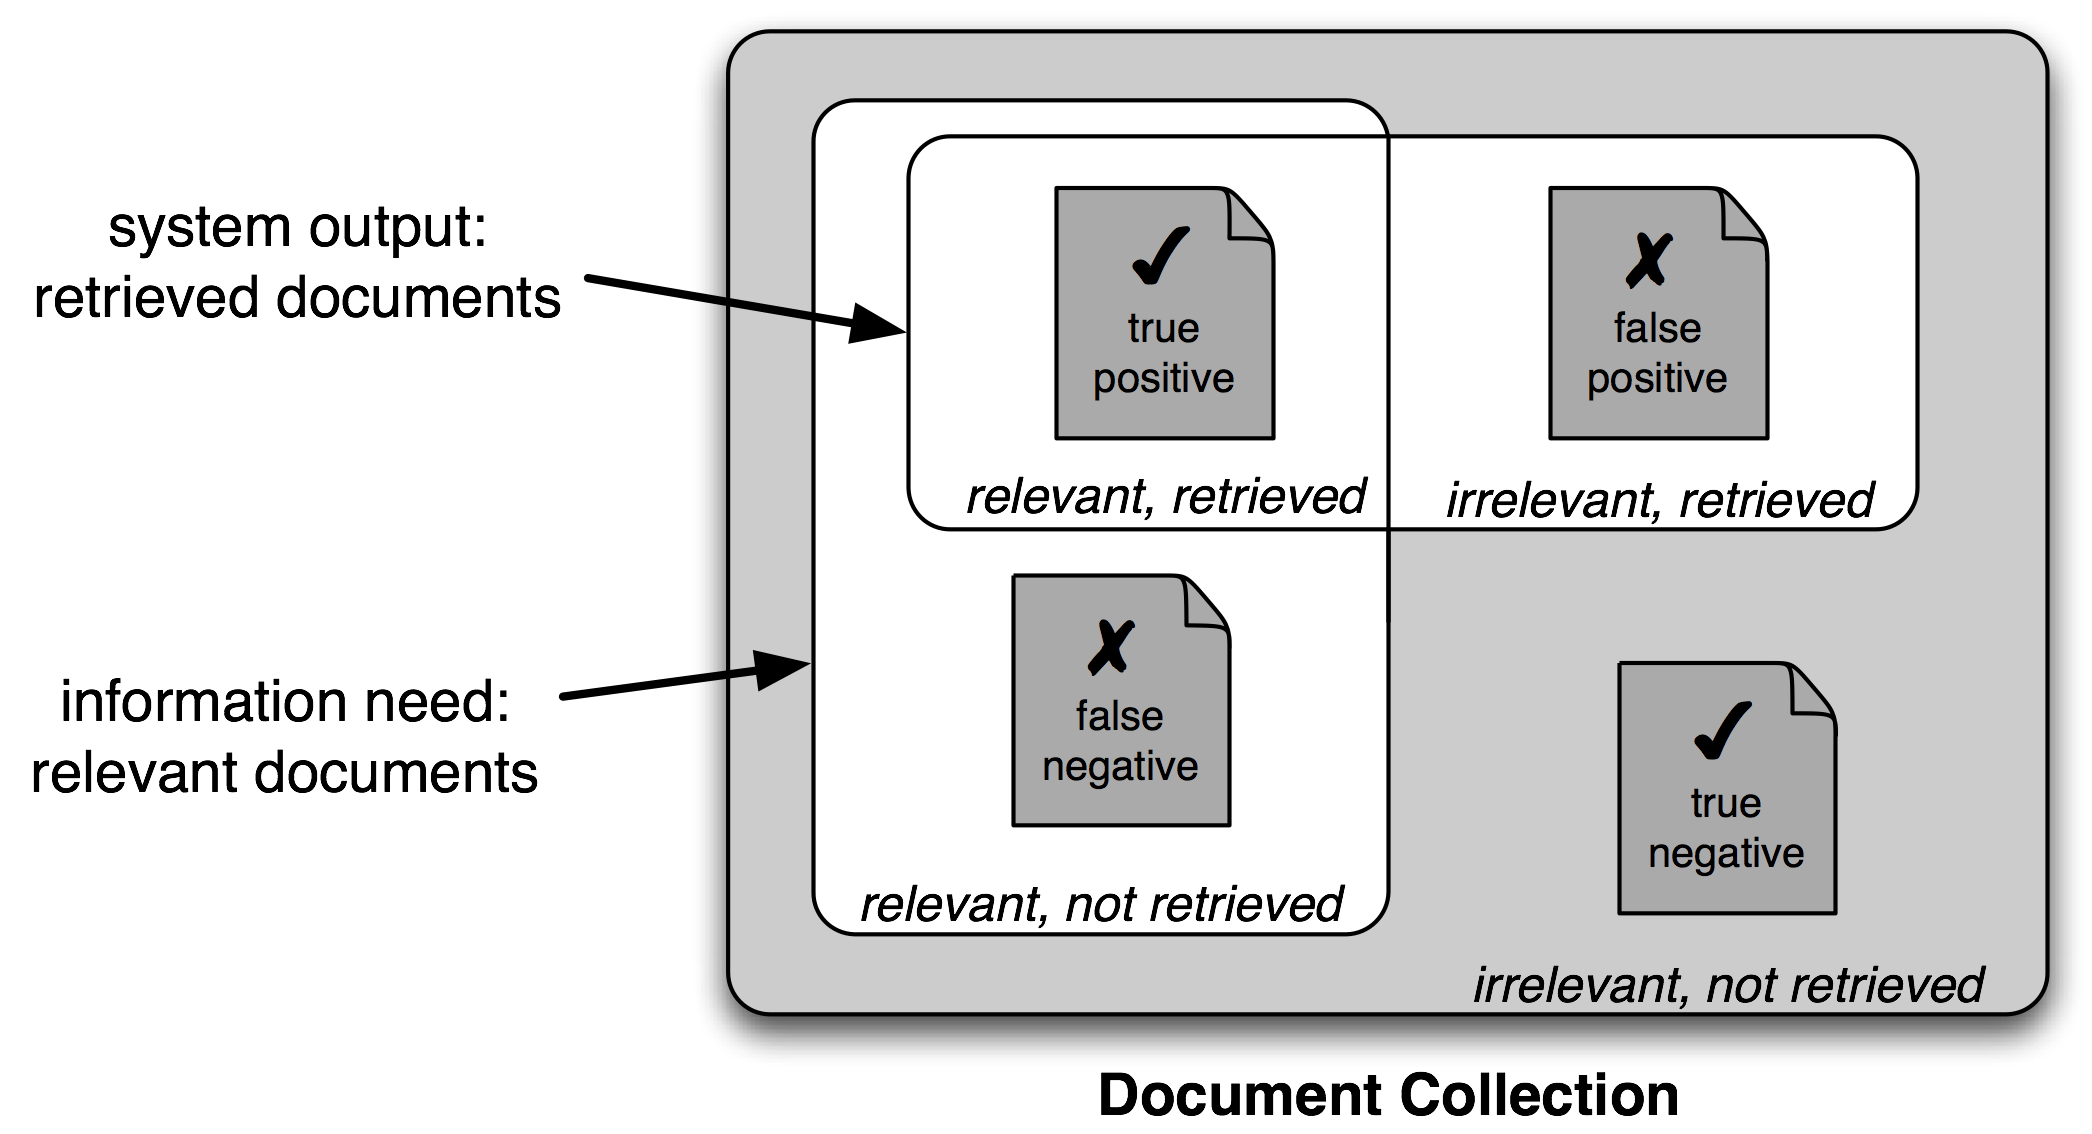

图 3.1：真与假的阳性和阴性

因此，对搜索任务使用不同的测量集是很常见的，基于[3.1](https://usyiyi.github.io/nlp-py-2e-zh/6.html#fig-precision-recall)所示的四个类别的每一个中的项目的数量：

- 真阳性是相关项目中我们正确识别为相关的。
- 真阴性是不相关项目中我们正确识别为不相关的。
- 假阳性（或I 型错误）是不相关项目中我们错误识别为相关的。
- 假阴性（或II型错误）是相关项目中我们错误识别为不相关的。

给定这四个数字，我们可以定义以下指标：

- 精确度，表示我们发现的项目中有多少是相关的，TP/(TP+FP)。
- 召回率，表示相关的项目中我们发现了多少，TP/(TP+FN)。
- F-度量值（或F-Score），组合精确度和召回率为一个单独的得分，被定义为精确度和召回率的调和平均数(2 × *Precision* × *Recall*) / (*Precision* + *Recall*)。

## 3.4 混淆矩阵

当处理有3 个或更多的标签的分类任务时，基于模型错误类型细分模型的错误是有信息量的。一个混淆矩阵是一个表，其中每个cells [i,j]表示正确的标签i被预测为标签j的次数。因此，对角线项目（即cells [|ii|](https://usyiyi.github.io/nlp-py-2e-zh/6.html#id17)）表示正确预测的标签，非对角线项目表示错误。在下面的例子中，我们为[4](https://usyiyi.github.io/nlp-py-2e-zh/5.html#sec-automatic-tagging)中开发的一元标注器生成一个混淆矩阵：

In [ ]:
def tag_list(tagged_sents):
    return [tag for sent in tagged_sents for (word, tag) in sent] # 该块原始代码有误，请参考下一个块的代码
def apply_tagger(tagger, corpus):
    return [tagger.tag(nltk.tag.untag(sent)) for sent in corpus]
gold = tag_list(brown.tagged_sents(categories='editorial'))
test = tag_list(apply_tagger(t2, brown.tagged_sents(categories='editorial')))
cm = nltk.ConfusionMatrix(gold, test)
print(cm.pretty_format(sort_by_count=True, show_percents=True, truncate=9))

In [83]:
import pickle

# 加载训练好的模型
with open("t2.pkl", "rb") as f:
    t2 = pickle.load(f)

# 定义辅助函数
def tag_list(tagged_sents):
    return [tag for sent in tagged_sents for (word, tag) in sent]

def apply_tagger(tagger, corpus):
    return [tagger.tag(nltk.tag.untag(sent)) for sent in corpus]

# 对测试集进行标注
gold = tag_list(brown.tagged_sents(categories='editorial'))
test = tag_list(apply_tagger(t2, brown.tagged_sents(categories='editorial')))

# 计算混淆矩阵并打印结果
cm = nltk.ConfusionMatrix(gold, test)
print(cm.pretty_format(sort_by_count=True, show_percents=True, truncate=9))

    |                                         N                      |
    |      N      I      A      J             N             V      N |
    |      N      N      T      J      .      S      ,      B      P |
----+----------------------------------------------------------------+
 NN | <11.9%>  0.0%      .   0.2%      .   0.0%      .   0.2%   0.0% |
 IN |   0.0%  <9.0%>     .      .      .   0.0%      .      .      . |
 AT |      .      .  <8.6%>     .      .      .      .      .      . |
 JJ |   1.6%      .      .  <4.0%>     .      .      .   0.0%   0.0% |
  . |      .      .      .      .  <4.8%>     .      .      .      . |
NNS |   1.5%      .      .      .      .  <3.3%>     .      .   0.0% |
  , |      .      .      .      .      .      .  <4.4%>     .      . |
 VB |   0.9%      .      .   0.0%      .      .      .  <2.4%>     . |
 NP |   1.0%      .      .   0.0%      .      .      .      .  <1.9%>|
----+----------------------------------------------------------------+
(row =

[](KCpe4pa9XiopIENoYXRHUFQg5aSq5aW955So5LqG)这个混淆矩阵显示常见的错误，包括`NN`替换为了`JJ`（1.6%的词），`NN`替换为了`NNS`（1.5%的词）。注意点（`.`）表示值为0 的单元格，对角线项目——对应正确的分类——用尖括号标记。.. XXX explain use of "reference" in the legend above.

## 3.5 交叉验证

为了评估我们的模型，我们必须为测试集保留一部分已标注的数据。正如我们已经提到，如果测试集是太小了，我们的评价可能不准确。然而，测试集设置较大通常意味着训练集设置较小，如果已标注数据的数量有限，这样设置对性能会产生重大影响。

这个问题的解决方案之一是在不同的测试集上执行多个评估，然后组合这些评估的得分，这种技术被称为交叉验证。特别是，我们将原始语料细分为N个子集称为折叠。对于每一个这些的折叠，我们使用*除*这个折叠中的数据外其他所有数据训练模型，然后在这个折叠上测试模型。即使个别的折叠可能是太小了而不能在其上给出准确的评价分数，综合评估得分是基于大量的数据，因此是相当可靠的。

第二，同样重要的，采用交叉验证的优势是，它可以让我们研究不同的训练集上性能变化有多大。如果我们从所有N个训练集得到非常相似的分数，然后我们可以相当有信心，得分是准确的。另一方面，如果N个训练集上分数很大不同，那么，我们应该对评估得分的准确性持怀疑态度。

## 4 决策树

接下来的三节中，我们将仔细看看可用于自动生成分类模型的三种机器学习方法：决策树、朴素贝叶斯分类器和最大熵分类器。正如我们所看到的，可以把这些学习方法看作黑盒子，直接训练模式，使用它们进行预测而不需要理解它们是如何工作的。但是，仔细看看这些学习方法如何基于一个训练集上的数据选择模型，会学到很多。了解这些方法可以帮助指导我们选择相应的特征，尤其是我们关于那些特征如何编码的决定。理解生成的模型可以让我们更好的提取信息，哪些特征对有信息量，那些特征之间如何相互关联。

决策树是一个简单的为输入值选择标签的流程图。这个流程图由检查特征值的决策节点和分配标签的叶节点组成。为输入值选择标签，我们以流程图的初始决策节点开始，称为其根节点。此节点包含一个条件，检查输入值的特征之一，基于该特征的值选择一个分支。沿着这个描述我们输入值的分支，我们到达了一个新的决策节点，有一个关于输入值的特征的新的条件。我们继续沿着每个节点的条件选择的分支，直到到达叶节点，它为输入值提供了一个标签。[4.1](https://usyiyi.github.io/nlp-py-2e-zh/6.html#fig-decision-tree)显示名字性别任务的决策树模型的例子。

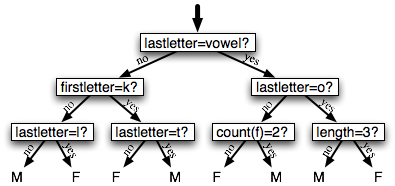

图 4.1：名字性别任务的决策树模型。请注意树图按照习惯画出“颠倒的”，根在上面，叶子在下面。

一旦我们有了一个决策树，就可以直接用它来分配标签给新的输入值。不那么直接的是我们如何能够建立一个模拟给定的训练集的决策树。但在此之前，我们看一下建立决策树的学习算法，思考一个简单的任务：为语料库选择最好的“决策树桩”。决策树桩是只有一个节点的决策树，基于一个特征决定如何为输入分类。每个可能的特征值一个叶子，为特征有那个值的输入指定类标签。要建立决策树桩，我们首先必须决定哪些特征应该使用。最简单的方法是为每个可能的特征建立一个决策树桩，看哪一个在训练数据上得到最高的准确度，也有其他的替代方案，我们将在下面讨论。一旦我们选择了一个特征，就可以通过分配一个标签给每个叶子，基于在训练集中所选的例子的最频繁的标签，建立决策树桩（即选择特征具有那个值的例子）。

给出了选择决策树桩的算法，生长出较大的决策树的算法就很简单了。首先，我们选择分类任务的整体最佳的决策树桩。然后，我们在训练集上检查每个叶子的准确度。没有达到足够的准确度的叶片被新的决策树桩替换，新决策树桩是在根据到叶子的路径选择的训练语料的子集上训练的。例如，我们可以使[4.1](https://usyiyi.github.io/nlp-py-2e-zh/6.html#fig-decision-tree)中的决策树生长，通过替换最左边的叶子为新的决策树桩，这个新的决策树桩是在名字不以"k"开始或以一个元音或"l"结尾的训练集的子集上训练的。

<a href="#41-熵和信息增益">4.1 熵和信息增益</a> 

## 4.1 熵和信息增益

正如之前提到的，有几种方法来为决策树桩确定最有信息量的特征。一种流行的替代方法，被称为信息增益，当我们用给定的特征分割输入值时，衡量它们变得更有序的程度。要衡量原始输入值集合如何无序，我们计算它们的标签的墒，如果输入值的标签非常不同，墒就高；如果输入值的标签都相同，墒就低。特别地，熵被定义为每个标签的概率乘以那个标签的log概率的总和：

In [67]:
import math
def entropy(labels):
    freqdist = nltk.FreqDist(labels)
    probs = [freqdist.freq(l) for l in freqdist]
    return -sum(p * math.log(p,2) for p in probs)

一旦我们已经计算了原始输入值的标签集的墒，就可以判断应用了决策树桩之后标签会变得多么有序。为了这样做，我们计算每个决策树桩的叶子的熵，利用这些叶子熵值的平均值（加权每片叶子的样本数量）。信息增益等于原来的熵减去这个新的减少的熵。信息增益越高，将输入值分为相关组的决策树桩就越好，于是我们可以通过选择具有最高信息增益的决策树桩来建立决策树。

决策树的另一个考虑因素是效率。前面描述的选择决策树桩的简单算法必须为每一个可能的特征构建候选决策树桩，并且这个过程必须在构造决策树的每个节点上不断重复。已经开发了一些算法通过存储和重用先前评估的例子的信息减少训练时间。

决策树有一些有用的性质。首先，它们简单明了，容易理解。决策树顶部附近尤其如此，这通常使学习算法可以找到非常有用的特征。决策树特别适合有很多层次的分类区别的情况。例如，决策树可以非常有效地捕捉进化树。

然而，决策树也有一些缺点。一个问题是，由于决策树的每个分支会划分训练数据，在训练树的低节点，可用的训练数据量可能会变得非常小。因此，这些较低的决策节点可能

过拟合训练集，学习模式反映训练集的特质而不是问题底层显著的语言学模式。对这个问题的一个解决方案是当训练数据量变得太小时停止分裂节点。另一种方案是长出一个完整的决策树，但随后剪去在开发测试集上不能提高性能的决策节点。

决策树的第二个问题是，它们强迫特征按照一个特定的顺序进行检查，即使特征可能是相对独立的。例如，按主题分类文档（如体育、汽车或谋杀之谜）时，特征如`hasword(football)`极可能表示一个特定标签，无论其他的特征值是什么。由于决策树顶部附近的空间有限，大部分这些特征将需要在树中的许多不同的分支中重复。因为越往树的下方，分支的数量成指数倍增长，重复量可能非常大。

一个相关的问题是决策树不善于利用对正确的标签具有较弱预测能力的特征。由于这些特征的影响相对较小，它们往往出现在决策树非常低的地方。决策树学习的时间远远不够用到这些特征，也不能留下足够的训练数据来可靠地确定它们应该有什么样的影响。如果我们能够在整个训练集中看看这些特征的影响，那么我们也许能够做出一些关于它们是如何影响标签的选择的结论。

决策树需要按一个特定的顺序检查特征的事实，限制了它们的利用相对独立的特征的能力。我们下面将讨论的朴素贝叶斯分类方法克服了这一限制，允许所有特征“并行”的起作用。

## 5 朴素贝叶斯分类器

在朴素贝叶斯分类器中，每个特征都得到发言权，来确定哪个标签应该被分配到一个给定的输入值。为一个输入值选择标签，朴素贝叶斯分类器以计算每个标签的先验概率开始，它由在训练集上检查每个标签的频率来确定。之后，每个特征的贡献与它的先验概率组合，得到每个标签的似然估计。似然估计最高的标签会分配给输入值。[5.1](https://usyiyi.github.io/nlp-py-2e-zh/6.html#fig-naive-bayes-triangle)说明了这一过程。

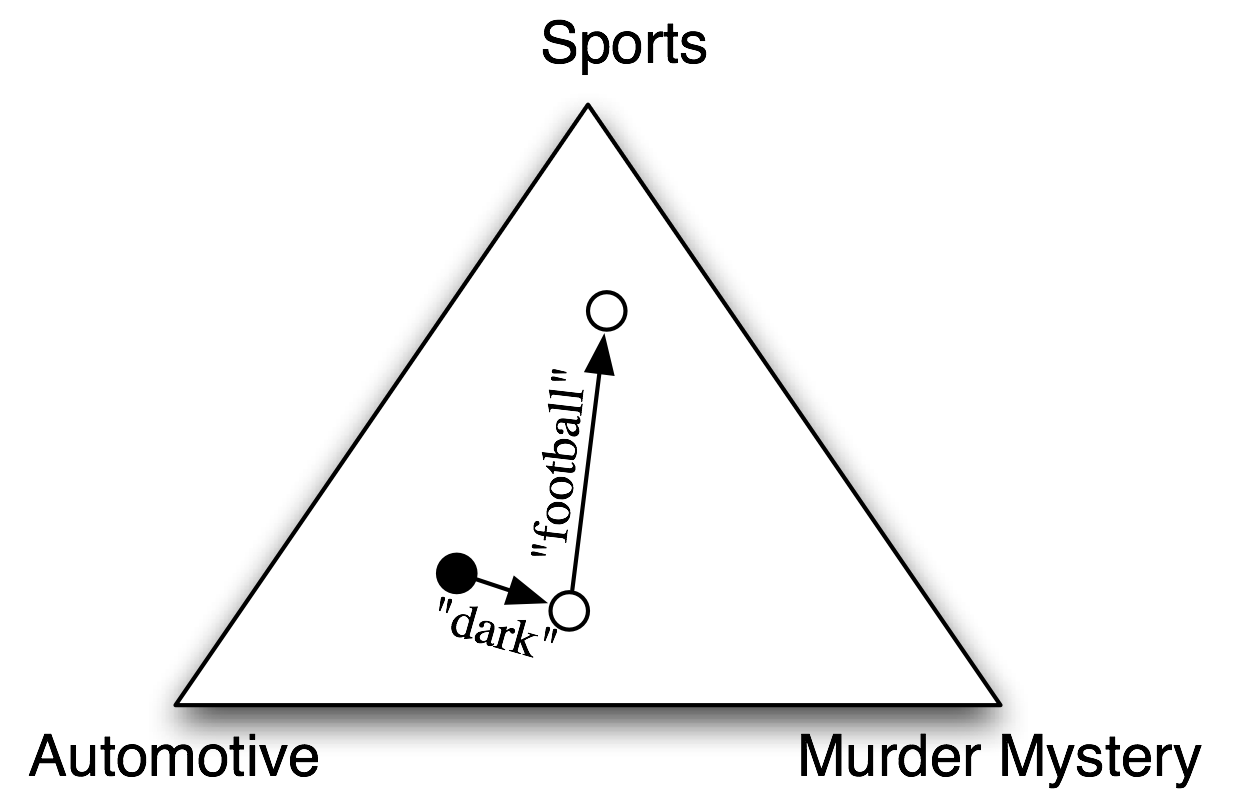

图 5.1：使用朴素贝叶斯分类器为文档选择主题的程序的抽象图解。在训练语料中，大多数文档是有关汽车的，所以分类器从接近“汽车”的标签的点上开始。但它会考虑每个特征的影响。在这个例子中，输入文档中包含的词"dark"，它是谋杀之谜的一个不太强的指标，也包含词"football"，它是体育文档的一个有力指标。每个特征都作出了贡献之后，分类器检查哪个标签最接近，并将该标签分配给输入。

个别特征对整体决策作出自己的贡献，通过“投票反对”那些不经常出现的特征的标签。特别是，每个标签的似然得分由于与输入值具有此特征的标签的概率相乘而减小。例如，如果词run在12%的体育文档中出现，在10%的谋杀之谜的文档中出现，在2％的汽车文档中出现，那么体育标签的似然得分将被乘以0.12，谋杀之谜标签将被乘以0.1，汽车标签将被乘以0.02。整体效果是略高于体育标签的得分的谋杀之谜标签的得分会减少，而汽车标签相对于其他两个标签会显著减少。这个过程如[5.2](https://usyiyi.github.io/nlp-py-2e-zh/6.html#fig-naive-bayes-bargraph)和[5.3](https://usyiyi.github.io/nlp-py-2e-zh/6.html#fig-naive-bayes-graph)所示。

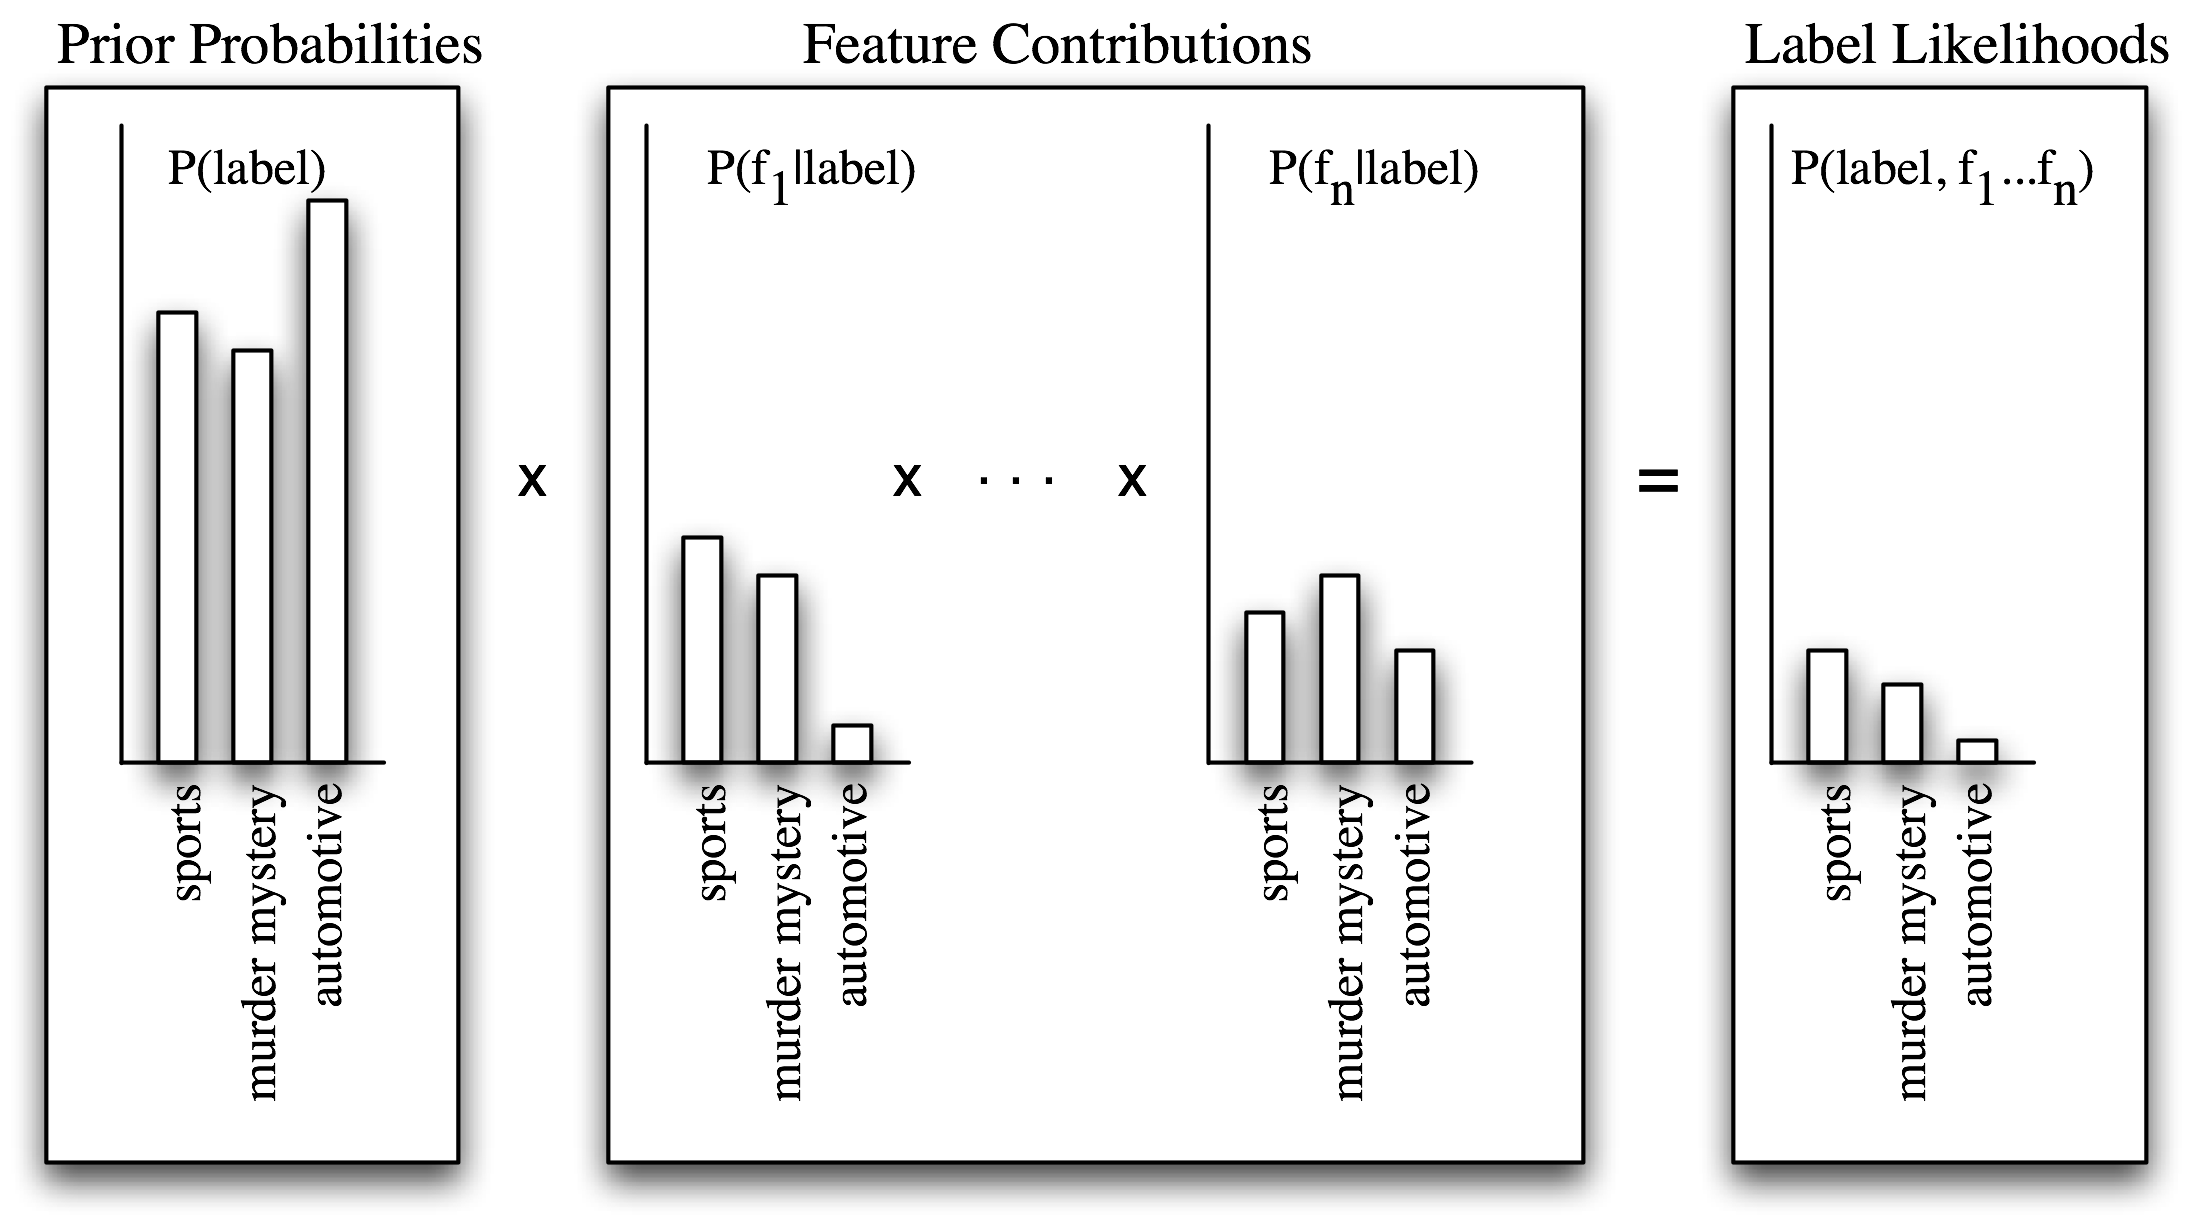

图 5.2：计算朴素贝叶斯的标签似然得分。朴素贝叶斯以计算每个标签的先验概率开始，基于每个标签出现在训练数据中的频率。然后每个特征都用于估计每个标签的似然估计，通过用输入值中有那个特征的标签的概率乘以它。似然得分结果可以认为是从具有给定的标签和特征集的训练集中随机选取的值的概率的估计，假设所有特征概率是独立的。

<a href="#51-底层的概率模型">5.1 底层的概率模型</a>

## 5.1 底层的概率模型

理解朴素贝叶斯分类器的另一种方式是它为输入选择最有可能的标签，基于下面的假设：每个输入值是通过首先为那个输入值选择一个类标签，然后产生每个特征的方式产生的，每个特征与其他特征完全独立。当然，这种假设是不现实的，特征往往高度依赖彼此。我们将在本节结尾回过来讨论这个假设的一些后果。这简化的假设，称为朴素贝叶斯假设（或独立性假设），使得它更容易组合不同特征的贡献，因为我们不必担心它们相互影响。



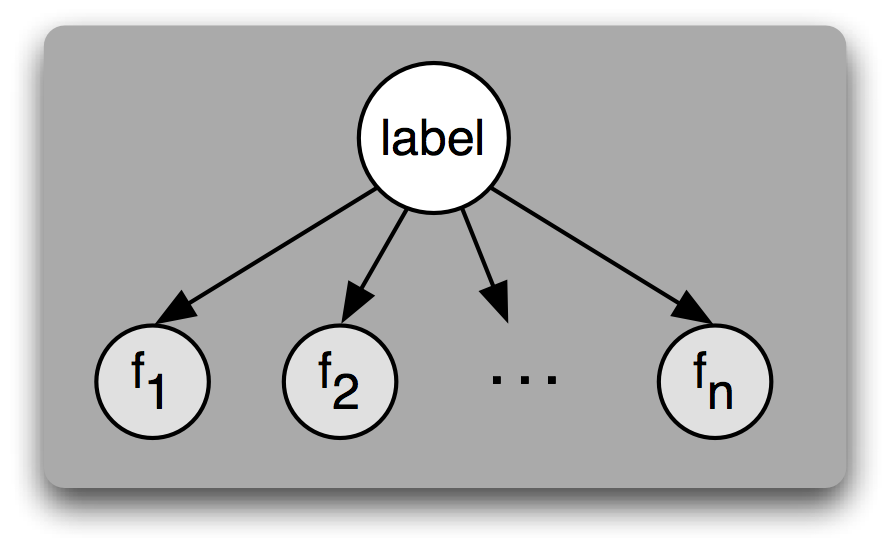

图 5.3：一个贝叶斯网络图演示朴素贝叶斯分类器假定的生成过程。要生成一个标记的输入，模型先为输入选择标签，然后基于该标签生成每个输入的特征。对给定标签，每个特征被认为是完全独立于所有其他特征的。

基于这个假设，我们可以计算表达式P(label|features)，给定一个特别的特征集一个输入具有特定标签的概率。要为一个新的输入选择标签，我们可以简单地选择使P(l|features)最大的标签l。

一开始，我们注意到P(label|features)等于具有特定标签*和*特定特征集的输入的概率除以具有特定特征集的输入的概率：

In [68]:
from nltk.corpus import senseval
instances = senseval.instances('hard.pos')
size = int(len(instances) * 0.1)
train_set, test_set = instances[size:], instances[:size]

使用这个数据集，建立一个分类器，预测一个给定的实例的正确的词意标签。关于使用Senseval 2 语料库返回的实例对象的信息请参阅`http://nltk.org/howto`上的语料库HOWTO。

☼ 使用本章讨论过的电影评论文档分类器，产生对分类器最有信息量的30个特征的列表。你能解释为什么这些特定特征具有信息量吗？你能在它们中找到什么惊人的发现吗？

☼ 选择一个本章所描述的分类任务，如名字性别检测、文档分类、词性标注或对话行为分类。使用相同的训练和测试数据，相同的特征提取器，建立该任务的三个分类器：：决策树、朴素贝叶斯分类器和最大熵分类器。比较你所选任务上这三个分类器的准确性。你如何看待如果你使用了不同的特征提取器，你的结果可能会不同？

☼ 同义词strong和powerful的模式不同（尝试将它们与chip和sales结合）。哪些特征与这种区别有关？建立一个分类器，预测每个词何时该被使用。

◑ 对话行为分类器为每个帖子分配标签，不考虑帖子的上下文背景。然而，对话行为是高度依赖上下文的，一些对话行序列可能比别的更相近。例如，ynQuestion 对话行为更容易被一个`yanswer`回答而不是以一个`问候`来回答。利用这一事实，建立一个连续的分类器，为对话行为加标签。一定要考虑哪些特征可能是有用的。参见[1.7](https://usyiyi.github.io/nlp-py-2e-zh/6.html#code-consecutive-pos-tagger)词性标记的连续分类器的代码，获得一些想法。

◑ 词特征在处理文本分类中是非常有用的，因为在一个文档中出现的词对于其语义内容是什么具有强烈的指示作用。然而，很多词很少出现，一些在文档中的最有信息量的词可能永远不会出现在我们的训练数据中。一种解决方法是使用一个词典，它描述了词之间的不同。使用WordNet词典，加强本章介绍的电影评论文档分类器，使用概括一个文档中出现的词的特征，使之更容易匹配在训练数据中发现的词。

★ PP 附件语料库是描述介词短语附着决策的语料库。语料库中的每个实例被编码为`PPAttachment`对象：

In [69]:
from nltk.corpus import ppattach
ppattach.attachments('training')

[PPAttachment(sent='0', verb='join', noun1='board', prep='as', noun2='director', attachment='V'), PPAttachment(sent='1', verb='is', noun1='chairman', prep='of', noun2='N.V.', attachment='N'), ...]

In [70]:
inst = ppattach.attachments('training')[1]
(inst.noun1, inst.prep, inst.noun2)

('chairman', 'of', 'N.V.')

选择`inst.attachment`为`N`的唯一实例：

In [71]:
nattach = [inst for inst in ppattach.attachments('training')
    if inst.attachment == 'N']

使用此子语料库，建立一个分类器，尝试预测哪些介词是用来连接一对给定的名词。例如，给定的名词对"team"和"researchers"，分类器应该预测出介词"of"。更多的使用PP附件语料库的信息，参阅`http://nltk.org/howto`上的语料库HOWTO。

★ 假设你想自动生成一个场景的散文描述，每个实体已经有了一个唯一描述此实体的词，例如the jar，只是想决定在有关的各项目中是否使用in或on，例如the book is in the cupboard对比the book is on the shelf。通过查找语料数据探讨这个问题；编写需要的程序。



(13) a.in the car *versus* on the trainb.in town *versus* on campusc.in the picture *versus* on the screend.in Macbeth *versus* on Letterman

关于本文档...

针对NLTK 3.0 作出更新。本章来自于*Natural Language Processing with Python*，[Steven Bird](http://estive.net/), [Ewan Klein](http://homepages.inf.ed.ac.uk/ewan/) 和[Edward Loper](http://ed.loper.org/)，Copyright © 2014 作者所有。本章依据*Creative Commons Attribution-Noncommercial-No Derivative Works 3.0 United States License* [http://creativecommons.org/licenses/by-nc-nd/3.0/us/] 条款，与*自然语言工具包* [`http://nltk.org/`] 3.0 版一起发行。

本文档构建于星期三 2015 年 7 月 1 日 12:30:05 AEST

## Docutils System Messages

System Message: ERROR/3 (`6.rst2`, line 1264); *[backlink](https://usyiyi.github.io/nlp-py-2e-zh/6.html#id18)*

Undefined substitution referenced: "ii".